In [19]:
import csv
import os
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import math


In [20]:
df = pd.read_csv('data_extension.csv')
df.head()

,Source.Name,shape_left,shape_right,probability_left,probability_right,address_left,address_right,difficulty,shape_left_es,shape_right_es,...,text_2.started.1,image_background4.stopped,text_2.stopped,participant,session,date,expName,psychopyVersion,frameRate,Column1
0,Anusha_EE_trial_2023-04-17_20h19.59.560.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Anusha,2.0,2023-04-17_20h19.59.560,EE_trial,05-02-2022,None,NaN
1,Anusha_EE_trial_2023-04-17_20h19.59.560.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Anusha,2.0,2023-04-17_20h19.59.560,EE_trial,05-02-2022,None,NaN
2,Anusha_EE_trial_2023-04-17_20h19.59.560.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Anusha,2.0,2023-04-17_20h19.59.560,EE_trial,05-02-2022,None,NaN
3,Anusha_EE_trial_2023-04-17_20h19.59.560.csv,triangle,square,0.4,0.6,triangle.png,square.png,NaN,NaN,NaN,...,NaN,NaN,NaN,Anusha,2.0,2023-04-17_20h19.59.560,EE_trial,05-02-2022,None,NaN
4,Anusha_EE_trial_2023-04-17_20h19.59.560.csv,cross,circle,0.1,0.9,cross.png,circle.png,NaN,NaN,NaN,...,NaN,NaN,NaN,Anusha,2.0,2023-04-17_20h19.59.560,EE_trial,05-02-2022,None,NaN


In [21]:


# define the logistic function
def logistic(x, a, b, c):
    return c / (1 + np.exp((x - b) / a))
def dict_sort(dictionary):
  myKeys = list(dictionary.keys())
  myKeys.sort()
  sorted_dict = {i: dictionary[i] for i in myKeys}
  return sorted_dict

no_participants=15
# df=pd.read_excel('')
df

,Source.Name,shape_left,shape_right,probability_left,probability_right,address_left,address_right,difficulty,shape_left_es,shape_right_es,...,text_2.started.1,image_background4.stopped,text_2.stopped,participant,session,date,expName,psychopyVersion,frameRate,Column1
0,Anusha_EE_trial_2023-04-17_20h19.59.560.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Anusha,2.0,2023-04-17_20h19.59.560,EE_trial,05-02-2022,None,NaN
1,Anusha_EE_trial_2023-04-17_20h19.59.560.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Anusha,2.0,2023-04-17_20h19.59.560,EE_trial,05-02-2022,None,NaN
2,Anusha_EE_trial_2023-04-17_20h19.59.560.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Anusha,2.0,2023-04-17_20h19.59.560,EE_trial,05-02-2022,None,NaN
3,Anusha_EE_trial_2023-04-17_20h19.59.560.csv,triangle,square,0.4,0.6,triangle.png,square.png,NaN,NaN,NaN,...,NaN,NaN,NaN,Anusha,2.0,2023-04-17_20h19.59.560,EE_trial,05-02-2022,None,NaN
4,Anusha_EE_trial_2023-04-17_20h19.59.560.csv,cross,circle,0.1,0.9,cross.png,circle.png,NaN,NaN,NaN,...,NaN,NaN,NaN,Anusha,2.0,2023-04-17_20h19.59.560,EE_trial,05-02-2022,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332,yohitha_EE_trial_2023-04-17_21h29.33.894.csv,NaN,NaN,NaN,NaN,NaN,NaN,5.0,square,-0.2,...,830.636639,NaN,NaN,yohitha,3.0,2023-04-17_21h29.33.894,EE_trial,05-02-2022,None,NaN
2333,yohitha_EE_trial_2023-04-17_21h29.33.894.csv,NaN,NaN,NaN,NaN,NaN,NaN,5.0,triangle,0.2,...,835.934632,NaN,NaN,yohitha,3.0,2023-04-17_21h29.33.894,EE_trial,05-02-2022,None,NaN
2334,yohitha_EE_trial_2023-04-17_21h29.33.894.csv,NaN,NaN,NaN,NaN,NaN,NaN,5.0,triangle,-0.4,...,838.517662,NaN,NaN,yohitha,3.0,2023-04-17_21h29.33.894,EE_trial,05-02-2022,None,NaN
2335,yohitha_EE_trial_2023-04-17_21h29.33.894.csv,NaN,NaN,NaN,NaN,NaN,NaN,5.0,square,-0.4,...,841.985731,842.481191,842.481191,yohitha,3.0,2023-04-17_21h29.33.894,EE_trial,05-02-2022,None,NaN


In [22]:
x=df[df['shape_left_es']=="square"]
x=x[['difficulty','shape_left_es','shape_right_es','probability_left_es','chosen_side_es']]
print(x)

      difficulty shape_left_es  shape_right_es  probability_left_es  \
51           1.0        square             0.4                  0.6   
52           1.0        square             0.8                  0.6   
56           1.0        square            -0.4                  0.6   
57           1.0        square             0.2                  0.6   
59           1.0        square             0.0                  0.6   
...          ...           ...             ...                  ...   
2314         5.0        square            -0.8                  0.6   
2325         5.0        square             0.2                  0.6   
2329         5.0        square             0.4                  0.6   
2332         5.0        square            -0.2                  0.6   
2335         5.0        square            -0.4                  0.6   

     chosen_side_es  
51            right  
52            right  
56             left  
57            right  
59            right  
...            

DIFFICULTY LEVEL : 1.0


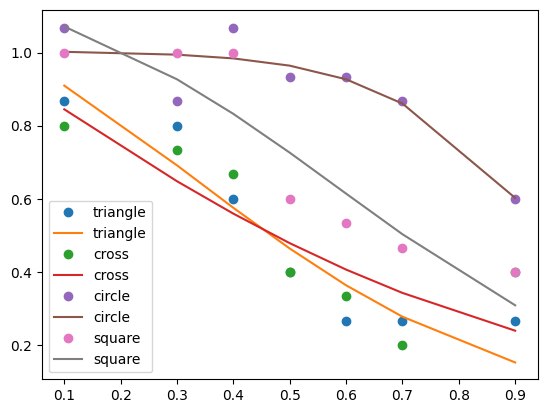

----------------------------------------------------------------------------------------------
DIFFICULTY LEVEL : 3.0


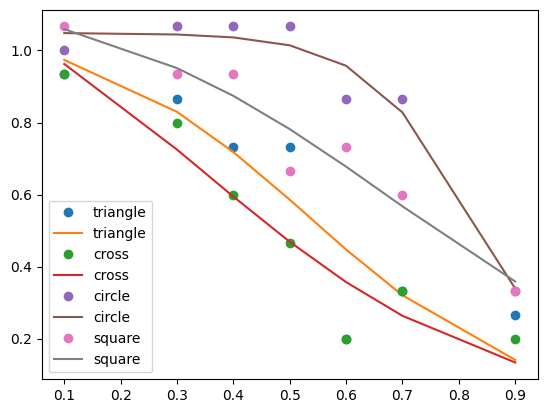

----------------------------------------------------------------------------------------------
DIFFICULTY LEVEL : 5.0


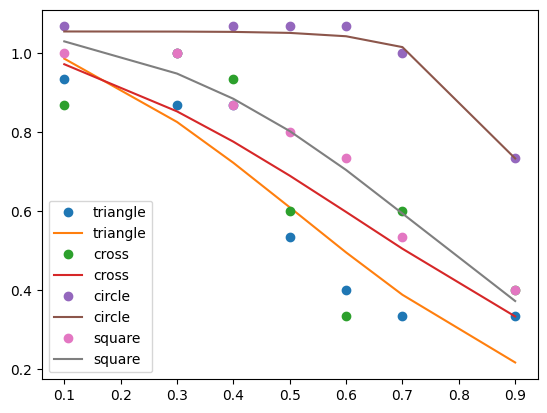

----------------------------------------------------------------------------------------------


In [23]:
indif_master={}
for difficulty in df['difficulty'].unique():
  if pd.isnull(difficulty): continue
  indif = {}
  print(f'DIFFICULTY LEVEL : {difficulty}')
  for shape in df['shape_left_es'].unique():
    if(pd.isnull(shape)): continue
    x = df[df['difficulty']==difficulty]
    x=x[x['shape_left_es']==shape]
    x=x[['shape_left_es','shape_right_es','probability_left_es','chosen_side_es']]
    dic={}
    for i in x.index:
      prob=round((float(x.loc[i,'shape_right_es'])+1)/2,2)
      if(prob not in dic):
        dic[prob]=0
      if(x.loc[i,'chosen_side_es']=='left'):
        dic[prob]+=1
    for i in dic:
      dic[i]=dic[i]/no_participants
    sorted_dict=dict_sort(dic)
    xdata=list(sorted_dict.keys())
    ydata=list(sorted_dict.values())
    # print(xdata,ydata)
    try:
      popt, pcov = curve_fit(logistic, xdata, ydata)
      # print(popt)
      plt.plot(xdata, ydata, 'o', label=shape)
      plt.plot(xdata, logistic(xdata, *popt), label=shape)
      x_indif = popt[0] * np.log(popt[2] / 0.5 - 1) + popt[1]
      # x_indif = popt[0] * np.log(1 / 0.5 - 1) + popt[1]
      indif[x['probability_left_es'].unique()[0]]=x_indif
      indif_master[difficulty] = indif
    except:
      print('Unable to fit for shape: ',shape)
  plt.legend()
  plt.show()
  print('----------------------------------------------------------------------------------------------')

In [24]:
indif_master

{1.0: {0.4: 0.46679723615455015,
  0.1: 0.47247060566355636,
  0.9: 0.9597410358794599,
  0.6: 0.7028004742444548},
 3.0: {0.4: 0.5616490749937915,
  0.1: 0.47440642339349937,
  0.9: 0.8373860079420992,
  0.6: 0.7613782781443519},
 5.0: {0.4: 0.5950984242020187,
  0.1: 0.7041717319180402,
  0.9: 0.9765285299264728,
  0.6: 0.7816110687262194}}

[0.4, 0.1, 0.9, 0.6] [0.46679723615455015, 0.47247060566355636, 0.9597410358794599, 0.7028004742444548]
[0.4, 0.1, 0.9, 0.6] [0.5616490749937915, 0.47440642339349937, 0.8373860079420992, 0.7613782781443519]
[0.4, 0.1, 0.9, 0.6] [0.5950984242020187, 0.7041717319180402, 0.9765285299264728, 0.7816110687262194]


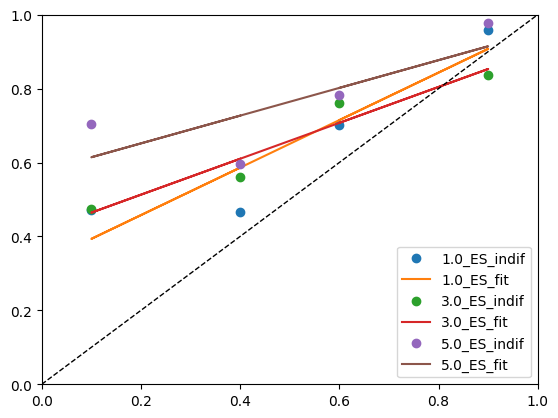

In [25]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# define the linear function
def linear(x, a, b):
  return a*np.array(x)+b

for difficulty in indif_master.keys():
  indif = indif_master[difficulty]
  xdata=list(indif.keys())
  ydata=list(indif.values())
  # print(xdata, ydata)
  # fit the logistic curve to the data
  popt, pcov = curve_fit(linear, xdata, ydata)

  # plot the data and the fitted curve
  plt.plot(xdata, ydata, 'o', label=f'{difficulty}_ES_indif')
  plt.plot(xdata, linear(xdata, *popt), label=f'{difficulty}_ES_fit')
  # plt.plot(xdata2, logistic(xdata2, *popt), label='fit2')
  plt.ylim([0,1])
plt.plot([0, 1], [0, 1], '--',color = 'black', linewidth = 1)
plt.xlim([0,1])
plt.legend()
plt.show()

